###       Lead Scoring Case Study 
####       Group Members :
           1. Balakrishna Gadiyar
           2. Deepak Kumar Padhan
           3. Bishnu Agrawal
 ======================================================================================================================         

#### Problem Statement  :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engine.Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education lead conversion rate is very poor.To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.The company requires to build a model wherein it need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 



### Step 1: Importing and Merging Data


In [256]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [257]:
# Import Data analysis,excel reading and visualization related packages
import numpy as np
import pandas as pd
#Importing the sklearn package
from sklearn.model_selection import train_test_split
#Importing Scaler
from sklearn.preprocessing import StandardScaler
#Importing visualization pacakages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xlrd
#Import metrics package from sklearn
from sklearn import metrics
#Importing Logistic regression model 
from sklearn.linear_model import LogisticRegression
# Importing package to run Training Model
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Import RFE
from sklearn.feature_selection import RFE
#Import precision and recall score packages
from sklearn.metrics import precision_score, recall_score
#Import recall curve package
from sklearn.metrics import precision_recall_curve

In [258]:
# Importing the leads datasets
lead_data = pd.read_csv("Leads.csv")


### Dictionary for reference

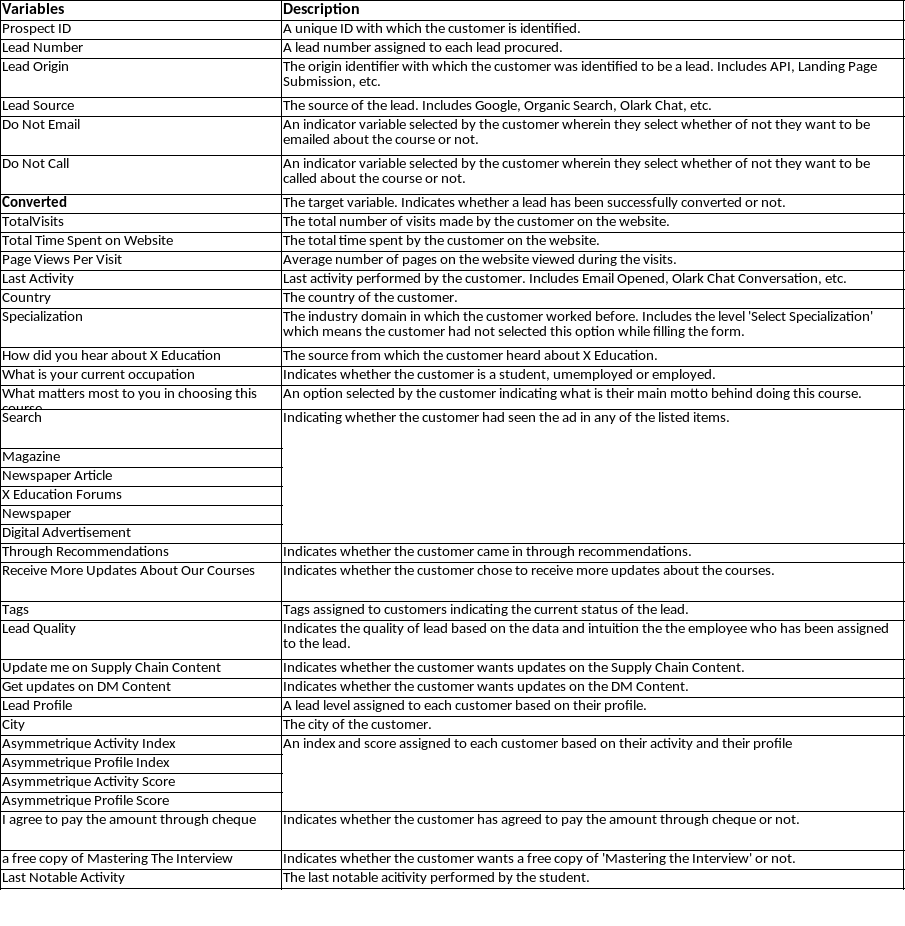


### Step 2: Inspecting the Dataframe

In [259]:
# Data Analysis - Reviewing given dataframe understand the each columns
lead_data.head(25)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [260]:
# Data Analysis - Review the shape of the dataframe .
lead_data.shape
# There are 9240 rows and 37 columns in the original dataframe

(9240, 37)

In [261]:
# Data Analysis - Describing the data to understand the range
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [262]:
# Data Analysis - Review the column types 
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [263]:
#Data Analysis - Reviewing the data frame for null values
lead_data.isnull().values.any()
#Clearly calls out presence of null values

True

In [264]:
# Data Analysis - Understanding null values by columns
lead_data.isnull().sum()
#We could see significant number of null values. Data correction steps are needed before building the model

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [265]:
# Data Analysis - Understanding the percentage of null data.

lead_data.isnull().sum()*100/lead_data.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Step 3: Data Preparation

In [266]:
#Let us list all columns for reference before proceeding with data prep
df_lead=lead_data
df_lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [267]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [268]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Specialization'].unique()
# Select and nan values needs to be aligned. 

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [269]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['How did you hear about X Education'].unique()
# Select and nan values needs to be aligned. 

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [270]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['What matters most to you in choosing a course'].unique()
# nan values needs to be aligned. 

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [271]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Magazine'].unique()
# Has only No values, doesn't make any sense to keep this column, can be dropped.

array(['No'], dtype=object)

In [272]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Receive More Updates About Our Courses'].unique()
# Has only No values, doesn't make any sense to keep this column, can be dropped.

array(['No'], dtype=object)

In [273]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Update me on Supply Chain Content'].unique()
# Has only No values, doesn't make any sense to keep this column, can be dropped.

array(['No'], dtype=object)

In [274]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Get updates on DM Content'].unique()
# Has only No values, doesn't make any sense to keep this column, can be dropped.

array(['No'], dtype=object)

In [275]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['I agree to pay the amount through cheque'].unique()
# Has only No values, doesn't make any sense to keep this column, can be dropped.

array(['No'], dtype=object)

In [276]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Lead Quality'].unique()
# nan values needs to be aligned. 

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [277]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Lead Profile'].unique()
# Select & nan values needs to be aligned. 

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [278]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Country'].unique()
# nan values needs to be aligned. 

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [279]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['City'].unique()
# Select & nan values needs to be aligned. could also replace them with 'Other Cities'

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [280]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Asymmetrique Activity Score'].unique()
# nan values needs to be aligned, through replacing mean values. Similarly Asymmetrique Profile Score can also be treated

array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18., nan,  7.])

In [281]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Prospect ID'].unique()
#These values doesn't make any sense, column can be dropped

array(['7927b2df-8bba-4d29-b9a2-b6e0beafe620',
       '2a272436-5132-4136-86fa-dcc88c88f482',
       '8cc8c611-a219-4f35-ad23-fdfd2656bd8a', ...,
       'aac550fe-a586-452d-8d3c-f1b62c94e02c',
       '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9',
       '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff'], dtype=object)

In [282]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Tags'].unique()
#These values doesn't make any sense, column can be dropped

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [283]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Asymmetrique Activity Index'].unique()
#These values doesn't make any sense, column can be dropped

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [284]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Asymmetrique Profile Index'].unique()
#These values doesn't make any sense, column can be dropped

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

#### Drop not useful Columns

In [285]:
#As reviewed earlier, dropping unnecessry columns
dropcols=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
df_lead.drop(dropcols, axis=1, inplace=True)
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [286]:
# List of Columns with 'Blank' and 'Select'

df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [287]:
# Drop Columns not be useful in deciding whether a lead will be converted or not  / Having one Value as 'No' / Having  > 30 % Null values ;

df_lead.drop(['Prospect ID', 'Tags','Asymmetrique Activity Index','Asymmetrique Profile Index'], axis=1, inplace=True)


#### Treat the 'Blank' and 'Select' with Null

In [288]:
# Impute the NULL and 'Select' Data Columns Values..

df_lead.replace('Select', np.nan,inplace = True)
df_lead['Country'].replace(np.nan, 'Unknown',inplace = True)
df_lead['City'].replace([np.nan,'Select'], 'Other Cities',inplace = True)
df_lead['Specialization'].replace([np.nan,'Select'], 'Not Specified',inplace = True)
df_lead['Lead Source'].replace([np.nan,'Select'], 'Unknown',inplace = True)
df_lead['Last Activity'].replace([np.nan,'Select'], 'Unknown',inplace = True)
df_lead['How did you hear about X Education'].replace([np.nan,'Select'], 'Not Specified',inplace = True)
df_lead['TotalVisits'].replace([np.nan,'Select'], '0',inplace = True)
df_lead['Page Views Per Visit'].replace([np.nan,'Select'], '0',inplace = True)
df_lead['What is your current occupation'].replace([np.nan,'Select'], 'Not Disclosed',inplace = True)
df_lead['What matters most to you in choosing a course'].replace([np.nan,'Select'], 'Other',inplace = True)
df_lead['Lead Quality'].replace([np.nan,'Select'], 'Not Sure',inplace = True)
df_lead['Lead Profile'].replace([np.nan,'Select'], 'Other Leads',inplace = True)
df_lead['Country'].replace([np.nan,'Select'], 'Other Cities',inplace = True)
df_lead['Asymmetrique Activity Score'].replace([np.nan,'Select'], round(df_lead["Asymmetrique Activity Score"].mean(),0),inplace = True)
df_lead['Asymmetrique Profile Score'].replace([np.nan,'Select'], round(df_lead["Asymmetrique Profile Score"].mean(),0),inplace = True)


In [289]:
#Reviewing the dataset post treating various columns
df_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,Lead Profile,City,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0,0,0,Page Visited on Website,...,No,No,No,Low in Relevance,Other Leads,Other Cities,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5,674,2.5,Email Opened,...,No,No,No,Not Sure,Other Leads,Other Cities,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2,Email Opened,...,No,No,No,Might be,Potential Lead,Mumbai,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1,Unreachable,...,No,No,No,Not Sure,Other Leads,Mumbai,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2,1428,1,Converted to Lead,...,No,No,No,Might be,Other Leads,Mumbai,15.0,18.0,No,Modified


In [290]:
#Reviwing columns for null values after treatment
df_lead.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

#### Data Preparation - Converting  binary variables (Yes/No) to 0/1

In [291]:
# List of variables to map 'Yes' as 1 and 'No' as 0.

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_lead1=df_lead
df_lead1[varlist] = df_lead1[varlist].apply(binary_map)

In [292]:
#Reviewing dataframe post converting logical values to numbers
df_lead1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,Lead Profile,City,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0,0,Page Visited on Website,...,0,0,0,Low in Relevance,Other Leads,Other Cities,15.0,15.0,0,Modified
1,660728,API,Organic Search,0,0,0,5,674,2.5,Email Opened,...,0,0,0,Not Sure,Other Leads,Other Cities,15.0,15.0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Email Opened,...,0,0,0,Might be,Potential Lead,Mumbai,14.0,20.0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Unreachable,...,0,0,0,Not Sure,Other Leads,Mumbai,13.0,17.0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2,1428,1,Converted to Lead,...,0,0,0,Might be,Other Leads,Mumbai,15.0,18.0,0,Modified


####  Data Preparation - Create dummy features for the categorical variables with multiple levels.

In [293]:
# Creating a dummy variable for the categorical variables and dropping the least relevant one.
df_lead2=df_lead1

# Creating dummy variables for the variable 'Lead Origin' and drop First
dm1 = pd.get_dummies(df_lead2['Lead Origin'], prefix='LeadOrigin',drop_first=True)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm1], axis=1)


In [294]:
dm1.head()

,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form
0,0,0,0,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [295]:
# Creating dummy variables for the variable 'Lead Source'
dm2 = pd.get_dummies(df_lead2['Lead Source'], prefix='LeadSource')
# Dropping LeadSource_Unknown column
dm2 = dm2.drop(['LeadSource_Unknown'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm2], axis=1)

dm2.head()


,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_NC_EDM,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,...,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_google,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
# Creating dummy variables for the variable 'Last Activity'
dm3 = pd.get_dummies(df_lead2['Last Activity'], prefix='LastActivity')
# Dropping 'LastActivity_Unknown column
dm3 = dm3.drop(['LastActivity_Unknown'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm3], axis=1)


dm3.head()

,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [297]:
# Creating dummy variables for the variable 'Specialization'
dm4 = pd.get_dummies(df_lead2['Specialization'], prefix='Specialization')
# Dropping Specialization_Not Specified column.
dm4 = dm4.drop(['Specialization_Not Specified'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm4], axis=1)


dm4.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [298]:
# Creating dummy variables for the variable 'How did you hear about X Education'
dm5 = pd.get_dummies(df_lead2['How did you hear about X Education'], prefix='How did you hear about X Education')
# Dropping 'How did you hear about X Education_Not Specified' column.
dm5 = dm5.drop(['How did you hear about X Education_Not Specified'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm5], axis=1)

dm5.head()

,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0


In [299]:
# Creating dummy variables for the variable 'What is your current occupation'
dm6 = pd.get_dummies(df_lead2['What is your current occupation'], prefix='What is your current occupation')
# Dropping 'What is your current occupation_Not Disclosed' column.
dm6 = dm6.drop(['What is your current occupation_Not Disclosed'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm6], axis=1)

dm6.head()

,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [300]:

# Creating dummy variables for the variable 'What is your current occupation'
dm7 = pd.get_dummies(df_lead2['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course')
# Dropping 'What matters most to you in choosing a course_Other' column.
dm7 = dm7.drop(['What matters most to you in choosing a course_Other'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm7], axis=1)

dm7.head()

,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [301]:
# Creating dummy variables for the variable 'Lead Quality'
dm8 = pd.get_dummies(df_lead2['Lead Quality'], prefix='LeadQuality')
# Dropping 'Lead Quality_Not Sure' column.
dm8 = dm8.drop(['LeadQuality_Not Sure'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm8], axis=1)

dm8.head()

,LeadQuality_High in Relevance,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Worst
0,0,1,0,0
1,0,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,0,1,0


In [302]:
# Creating dummy variables for the variable 'Lead Profile'
dm9 = pd.get_dummies(df_lead2['Lead Profile'], prefix='LeadProfile')
# Dropping 'LeadProfile_Other Leads' column.
dm9 = dm9.drop(['LeadProfile_Other Leads'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm9], axis=1)

dm9.head()


,LeadProfile_Dual Specialization Student,LeadProfile_Lateral Student,LeadProfile_Potential Lead,LeadProfile_Student of SomeSchool
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,0,0,0


In [303]:
# Creating dummy variables for the variable 'Last Notable Activity'
dm10 = pd.get_dummies(df_lead2['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping 'LastNotableActivity_View in browser link Clicked' column.
dm10 = dm10.drop(['LastNotableActivity_View in browser link Clicked'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm10], axis=1)

dm10.head()

,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [304]:
#Reviewing the shape of new data frame post dummy variables and other treatment 
df_lead2.shape

(9240, 128)

In [305]:
#Reviewing the dataframe post treatment
df_lead2.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
0,660737,API,Olark Chat,0,0,0,0,0,0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2,1428,1,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


#### Data Prep - Dropping the origianal features post dummy variable creation

In [306]:
# Data Prep - Dropping the origianal features post dummy variable creation

df_lead3=df_lead2

df_lead3 = df_lead3.drop(['Lead Origin', 'Lead Source','Last Activity','Specialization',
                        'How did you hear about X Education',
                        'What is your current occupation',
                        'What matters most to you in choosing a course',
                       'Lead Quality','Lead Profile','Last Notable Activity'], 1)


In [307]:
#Post analysis, we could even drop city and country as their values are not significant
df_lead3 = df_lead3.drop(['Country','City'],1)

In [308]:
#Reviewing the dataframe again
df_lead3.head()
#Data frame is ready for building model.

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
0,660737,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2,1532,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1,305,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,0,0,1,2,1428,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [309]:
# Revewing if there are nulls in the dataframe
df_lead3.isnull().sum()

Lead Number                                                                0
Do Not Email                                                               0
Do Not Call                                                                0
Converted                                                                  0
TotalVisits                                                                0
Total Time Spent on Website                                                0
Page Views Per Visit                                                       0
Search                                                                     0
Newspaper Article                                                          0
X Education Forums                                                         0
Newspaper                                                                  0
Digital Advertisement                                                      0
Through Recommendations                                                    0

In [310]:
#Reviewing the shapre of the dataframe to see number of columns 
df_lead3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 116 entries, Lead Number to LastNotableActivity_Unsubscribed
dtypes: float64(2), int64(12), object(2), uint8(100)
memory usage: 2.0+ MB


In [311]:
df_lead3.select_dtypes(include=[np.object]).head()

,TotalVisits,Page Views Per Visit
0,0,0
1,5,2.5
2,2,2
3,1,1
4,2,1


### Checking for Outliers

In [312]:
# Checking for outliers in the continuous variables
num_dflead3 = df_lead3[['Total Time Spent on Website','Page Views Per Visit']]


In [313]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_dflead3.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website
count,9240.000000
mean,487.698268
std,548.021466
min,0.000000
25%,12.000000
50%,248.000000
75%,936.000000
90%,1380.000000
95%,1562.000000
99%,1840.610000


In [314]:
# Checking the percentage of missing values
round(100*(df_lead3.isnull().sum()/len(df_lead3.index)), 2)

Lead Number                                                                0.0
Do Not Email                                                               0.0
Do Not Call                                                                0.0
Converted                                                                  0.0
TotalVisits                                                                0.0
Total Time Spent on Website                                                0.0
Page Views Per Visit                                                       0.0
Search                                                                     0.0
Newspaper Article                                                          0.0
X Education Forums                                                         0.0
Newspaper                                                                  0.0
Digital Advertisement                                                      0.0
Through Recommendations                             

In [315]:
df_lead3.dtypes

Lead Number                                                                  int64
Do Not Email                                                                 int64
Do Not Call                                                                  int64
Converted                                                                    int64
TotalVisits                                                                 object
Total Time Spent on Website                                                  int64
Page Views Per Visit                                                        object
Search                                                                       int64
Newspaper Article                                                            int64
X Education Forums                                                           int64
Newspaper                                                                    int64
Digital Advertisement                                                        int64
Thro

In [316]:
# Convert Objects Datatypes to Numeric.
df_lead4=df_lead3

df_lead4['Total Time Spent on Website'] = pd.to_numeric(df_lead4['Total Time Spent on Website'],errors='coerce')
df_lead4['TotalVisits'] = pd.to_numeric(df_lead4['TotalVisits'],errors='coerce')
df_lead4['Page Views Per Visit'] = pd.to_numeric(df_lead4['Page Views Per Visit'],errors='coerce')

### Step 4: Test-Train Split

In [317]:
# Putting feature variable to X

X = df_lead4.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [318]:
# Putting response variable to y
y = df_lead4['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [319]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [320]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
1871,0,0,0.0,-0.885371,-1.062143,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,4.0,0.005716,-0.452487,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,5.0,-0.691418,0.083827,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,5.0,1.365219,1.229797,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3934,0,0,0.0,-0.885371,-1.062143,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [321]:
### Checking the Converted Rate
Converted = (sum(df_lead4['Converted'])/len(df_lead4['Converted'].index))*100
Converted

38.53896103896104

### Step 6: Looking at Correlations


In [322]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(df_lead4.corr(),annot = True)
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


#### Dropping highly correlated dummy variables


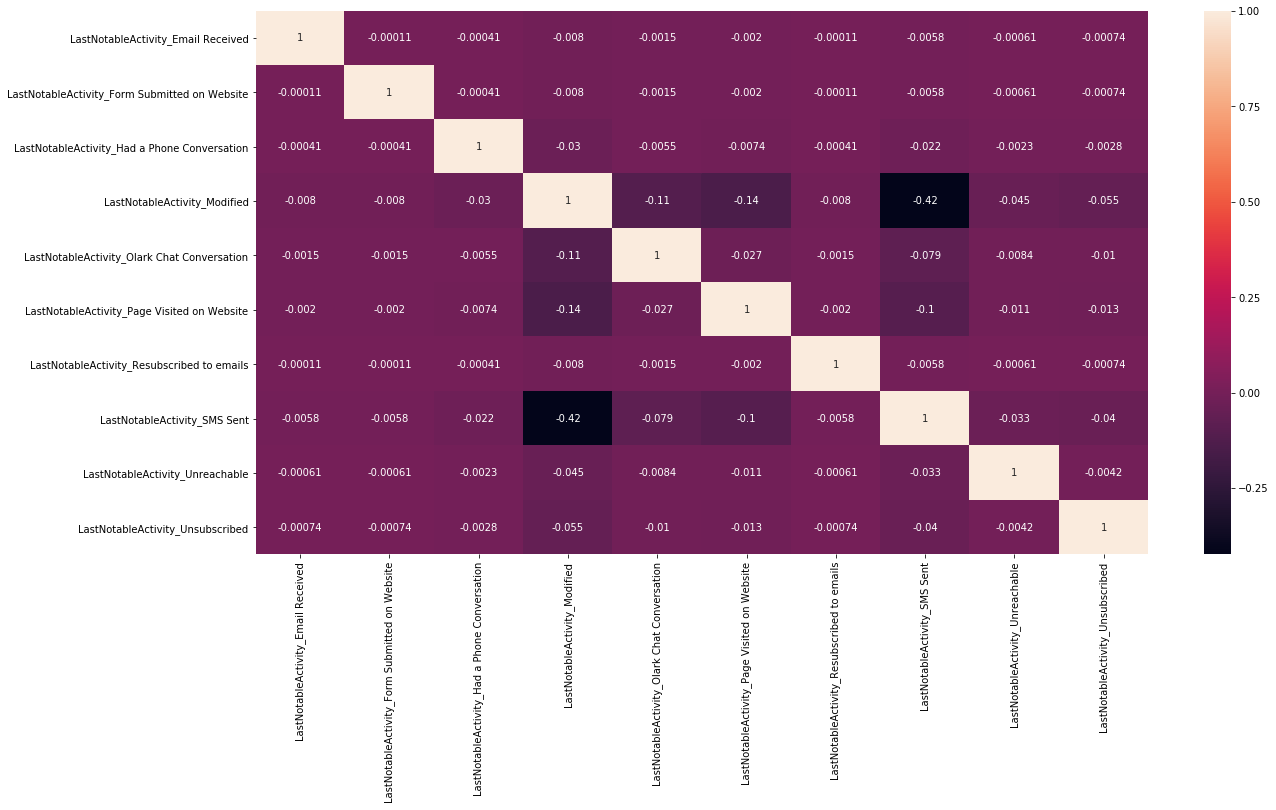

In [323]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_lead4[['LastNotableActivity_Email Received',
       'LastNotableActivity_Form Submitted on Website',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Resubscribed to emails',
       'LastNotableActivity_SMS Sent', 'LastNotableActivity_Unreachable',
       'LastNotableActivity_Unsubscribed']].corr(),annot = True)
plt.show()

In [324]:
df_lead4.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'X Education Forums',
       ...
       'LastNotableActivity_Email Received',
       'LastNotableActivity_Form Submitted on Website',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Resubscribed to emails',
       'LastNotableActivity_SMS Sent', 'LastNotableActivity_Unreachable',
       'LastNotableActivity_Unsubscribed'],
      dtype='object', length=116)

### Step 7: Model Building

In [325]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                          109
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2023.6
Date:                Sun, 03 Mar 2019   Deviance:                       4047.3
Time:                        12:32:59   Pearson chi2:                 6.40e+03
No. Iterations:                    23                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                     -10.6670   1.75e+04     -0.001      1.000   -3.43e+04    3.43e+04
Do Not Email                                                               -0.8798      0.249     -3.535      0.000      -1.368      -0.392
Do Not Call                                                                23.7008   9.08e+04      0.000      1.000   -1.78e+05    1.78e+05
TotalVisits                                                                 0.0230      0.009      2.551      0.011       0.005       0.041
Total Time Spent on Website                                                 1.0667      0.047     22.676      0.000       0.975       1.159
Page Views Per Visit                                                       -0.1675      0.063     -2.664      0.008      -0.291      -0.044
Search                                                                      0.3881      1.069      0.363      0.717      -1.708       2.484
Newspaper Article                                                          24.3988   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
X Education Forums                                                        -24.5234   2.07e+05     -0.000      1.000   -4.06e+05    4.06e+05
Newspaper                                                                 -25.2299   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Digital Advertisement                                                     -23.3343   9.22e+04     -0.000      1.000   -1.81e+05    1.81e+05
Through Recommendations                                                     1.1909      1.604      0.742      0.458      -1.954       4.335
Asymmetrique Activity Score                                                 0.6665      0.050     13.252      0.000       0.568       0.765
Asymmetrique Profile Score                                                  0.0220      0.046      0.479      0.632      -0.068       0.112
A free copy of Mastering The Interview                                      0.0848      0.162      0.523      0.601      -0.233       0.403
LeadOrigin_Landing Page Submission                                         -0.7445      0.198     -3.755      0.000      -1.133      -0.356
LeadOrigin_Lead Add Form                                                    1.5780      1.503      1.050      0.294      -1.369       4.525
LeadOrigin_Lead Import                                                      1.1099      1.696      0.654      0.513      -2.215       4.435
LeadOrigin_Quick Add Form                                                  22.6440   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
LeadSource_Click2call                                                      -2.8721


### Step 8: Feature Selection Using RFE


In [326]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)


In [327]:
#Support variable
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False])

In [328]:
#Reviewing the ranking of variables from RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('TotalVisits', False, 94),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 76),
 ('Search', False, 58),
 ('Newspaper Article', False, 51),
 ('X Education Forums', False, 85),
 ('Newspaper', False, 18),
 ('Digital Advertisement', False, 29),
 ('Through Recommendations', False, 35),
 ('Asymmetrique Activity Score', False, 28),
 ('Asymmetrique Profile Score', False, 72),
 ('A free copy of Mastering The Interview', False, 67),
 ('LeadOrigin_Landing Page Submission', False, 21),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 45),
 ('LeadOrigin_Quick Add Form', False, 77),
 ('LeadSource_Click2call', False, 11),
 ('LeadSource_Direct Traffic', False, 2),
 ('LeadSource_Facebook', True, 1),
 ('LeadSource_Google', False, 4),
 ('LeadSource_Live Chat', False, 64),
 ('LeadSource_NC_EDM', False, 49),
 ('LeadSource_Olark Chat', False, 46),
 ('LeadSource_Organic Search', False, 3),
 ('LeadS

In [329]:
#Columns to consider for further analysis
col = X_train.columns[rfe.support_]

In [330]:
#Map train columns
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Import',
       'LeadOrigin_Quick Add Form', 'LeadSource_Click2call',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Live Chat', 'LeadSource_NC_EDM', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Pay per Click Ads',
       'LeadSource_Press_Release', 'LeadSource_Reference',
       'LeadSource_Social Media', 'LeadSource_WeLearn', 'LeadSource_bing',
       'LeadSource_blog', 'LeadSource_google', 'LeadSource_testone',
       'LeadSource_welearnblog_Home', 'LeadSource_youtubechannel',
       'LastActivity_Approached upfront', 'LastActivity_Converted to Lead',
       'La

##### Assessing the model with StatsModels

In [331]:
#Add constraint and fit
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2338.4
Date:                Sun, 03 Mar 2019   Deviance:                       4676.7
Time:                        12:33:08   Pearson chi2:                 6.76e+03
No. Iterations:                    22                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8698      0.056    -33.321      0.000      -1.980      -1.760
Do Not Email                                            -1.1894      0.174     -6.817      0.000      -1.531      -0.847
Total Time Spent on Website                              0.8378      0.037     22.533      0.000       0.765       0.911
LeadOrigin_Lead Add Form                                 2.0998      0.205     10.228      0.000       1.697       2.502
LeadSource_Facebook                                     -0.6654      0.535     -1.243      0.214      -1.715       0.384
LeadSource_Referral Sites                               -0.5261      0.324     -1.621      0.105      -1.162       0.110
LeadSource_Welingak Website                              3.5263      0.750      4.703      0.000       2.057       4.996
LastActivity_SMS Sent                                    1.3642      0.079     17.365      0.000       1.210       1.518
What is your current occupation_Housewife               22.2895   2.44e+04      0.001      0.999   -4.77e+04    4.78e+04
What is your current occupation_Working Professional     1.8102      0.208      8.714      0.000       1.403       2.217
LeadQuality_High in Relevance                            3.7210      0.232     16.072      0.000       3.267       4.175
LeadQuality_Low in Relevance                             2.7084      0.158     17.117      0.000       2.398       3.019
LeadQuality_Might be                                     1.5827      0.097     16.281      0.000       1.392       1.773
LeadQuality_Worst                                       -1.9907      0.337     -5.912      0.000      -2.651      -1.331
LeadProfile_Dual Specialization Student                 21.8146   1.63e+04      0.001      0.999    -3.2e+04    3.21e+04
LastNotableActivity_Unreachable                          1.4280      0.610      2.339      0.019       0.231       2.624
========================================================================================================================
"""

In [332]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.068403
6795    0.134126
3516    0.079512
8105    0.902112
3934    0.068403
4844    0.988434
3297    0.077188
8071    0.996097
987     0.131439
7423    0.938853
dtype: float64

In [333]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06840345, 0.13412573, 0.07951238, 0.90211249, 0.06840345,
       0.98843415, 0.07718801, 0.99609744, 0.1314386 , 0.93885257])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [334]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':y_train_pred})
y_train_pred_final['Lead_Number'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score,Lead_Number
0,0,0.068403,1871
1,0,0.134126,6795
2,0,0.079512,3516
3,0,0.902112,8105
4,0,0.068403,3934


#### Creating new column 'Predicted' with 1 if Converted_Prob >= 0.8 else 0

In [335]:
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x >= 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead_Score,Lead_Number,Predicted
0,0,0.068403,1871,0
1,0,0.134126,6795,0
2,0,0.079512,3516,0
3,0,0.902112,8105,1
4,0,0.068403,3934,0


In [336]:
y_train_pred_final.head(10)

,Converted,Lead_Score,Lead_Number,Predicted
0,0,0.068403,1871,0
1,0,0.134126,6795,0
2,0,0.079512,3516,0
3,0,0.902112,8105,1
4,0,0.068403,3934,0
5,1,0.988434,4844,1
6,0,0.077188,3297,0
7,1,0.996097,8071,1
8,0,0.131439,987,0
9,1,0.938853,7423,1


In [337]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3903   99]
 [1173 1293]]


In [338]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        3903      99
# Converted            1173      1293 

In [339]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8033395176252319


#### Checking VIFs

Variance Inflation Factor(VIF), to observe how much the feature variables are correlated with each other. 

In [340]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,LeadOrigin_Lead Add Form,1.65
11,LeadQuality_Might be,1.57
6,LastActivity_SMS Sent,1.38
8,What is your current occupation_Working Profes...,1.35
5,LeadSource_Welingak Website,1.27
9,LeadQuality_High in Relevance,1.24
10,LeadQuality_Low in Relevance,1.13
1,Total Time Spent on Website,1.12
0,Do Not Email,1.05
12,LeadQuality_Worst,1.03


## Metrics for  sensitivity and specificity

In [341]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [342]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.524330900243309

In [343]:
# Let us calculate specificity
TN / float(TN+FP)

0.9752623688155923

In [344]:
# Calculate false postive rate - predicting Convert when lead does not have Converted.
print(FP/ float(TN+FP))

0.024737631184407798


In [345]:
# positive predictive value 
print (TP / float(TP+FP))

0.9288793103448276


In [346]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7689125295508275


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [348]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [349]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score, drop_intermediate = False )

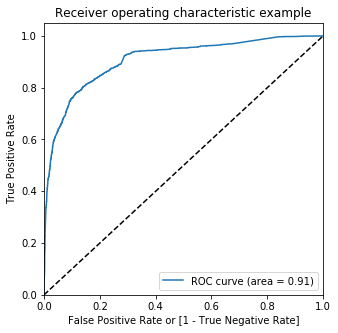

In [350]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score)

### Step 10: Finding Optimal Cutoff Point
##### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [351]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score,Lead_Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.068403,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.134126,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.079512,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.902112,8105,1,1,1,1,1,1,1,1,1,1,1
4,0,0.068403,3934,0,1,0,0,0,0,0,0,0,0,0


In [352]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.705782  0.948094  0.556472
0.2   0.2  0.789734  0.926602  0.705397
0.3   0.3  0.818955  0.841849  0.804848
0.4   0.4  0.842764  0.783049  0.879560
0.5   0.5  0.846630  0.748986  0.906797
0.6   0.6  0.836271  0.684915  0.929535
0.7   0.7  0.826994  0.614761  0.957771
0.8   0.8  0.803340  0.524331  0.975262
0.9   0.9  0.768862  0.413220  0.988006


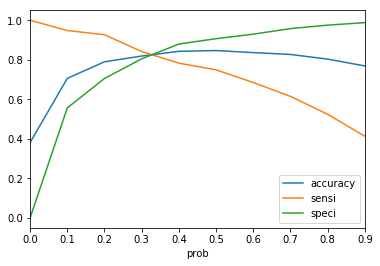

In [353]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [354]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score.map( lambda x: 1 if x > 0.8 else 0)

y_train_pred_final.head()

,Converted,Lead_Score,Lead_Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.068403,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.134126,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.079512,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.902112,8105,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.068403,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [355]:
y_train_pred_final.head(10)

,Converted,Lead_Score,Lead_Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.068403,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.134126,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.079512,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.902112,8105,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.068403,3934,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0.988434,4844,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.077188,3297,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0.996097,8071,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0.131439,987,0,1,1,0,0,0,0,0,0,0,0,0
9,1,0.938853,7423,1,1,1,1,1,1,1,1,1,1,1,1


In [356]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8033395176252319

In [357]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3903,   99],
       [1173, 1293]])

In [358]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [359]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.524330900243309

In [360]:
# Let us calculate specificity
TN / float(TN+FP)

0.9752623688155923

In [361]:
# Calculate false postive rate -  predicting Convert when lead does not have Converted.
print(FP/ float(TN+FP))

0.024737631184407798


In [362]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9288793103448276


In [363]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7689125295508275


## Precision and Recall


In [364]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3903,   99],
       [1173, 1293]])

##### Precision
TP / TP + FP

In [365]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9288793103448276

##### Recall
TP / TP + FN

In [366]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.524330900243309

In [367]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9288793103448276

In [368]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.524330900243309

In [369]:
### Precision and recall tradeoff
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
        ..
 6438    1
 6439    0
 6440    1
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    0
 6447    0
 6448    0
 6449    0
 6450    1
 6451    1
 6452    1
 6453    1
 6454    1
 6455    1
 6456    1
 6457    1
 6458    0
 6459    1
 6460    1
 6461    0
 6462    1
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      1
 22      1
 23      1
 24      1
 25      

In [370]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

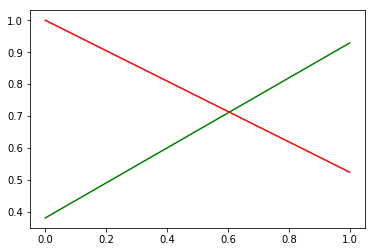

In [371]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [372]:
### Step 11: Making predictions on the test set
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

X_test.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
4269,0,0,8.0,0.933036,2.660405,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2376,0,0,0.0,-0.900812,-1.108316,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7766,0,0,5.0,-0.793792,1.247135,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9199,0,0,0.0,-0.900812,-1.108316,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4359,0,0,0.0,-0.900812,-1.108316,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [373]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Facebook,LeadSource_Referral Sites,LeadSource_Welingak Website,LastActivity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,LeadQuality_High in Relevance,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Worst,LeadProfile_Dual Specialization Student,LastNotableActivity_Unreachable
4269,0,0.933036,0,0,0,0,1,0,0,0,0,0,0,0,0
2376,0,-0.900812,1,0,0,0,1,0,0,0,1,0,0,0,0
7766,0,-0.793792,0,0,0,0,0,0,1,0,0,1,0,0,1
9199,0,-0.900812,0,0,0,0,0,0,0,0,0,0,0,0,0
4359,0,-0.900812,1,0,0,0,0,0,0,0,1,0,0,0,0


In [374]:
X_test_sm = sm.add_constant(X_test)

In [375]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [376]:
y_test_pred[:10]

4269    0.568598
2376    0.972023
7766    0.907724
9199    0.067584
4359    0.898784
9186    0.967416
1631    0.835258
8963    0.346506
8007    0.108935
5324    0.937259
dtype: float64

In [377]:
# Converting y_pred to a dataframe.
y_pred_1 = pd.DataFrame(y_test_pred)

In [378]:
y_pred_1.head()

,0
4269,0.568598
2376,0.972023
7766,0.907724
9199,0.067584
4359,0.898784


In [379]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [380]:
# Putting Lead_Number to index
y_test_df['Lead_Number'] = y_test_df.index

In [381]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [382]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [383]:
y_pred_final.head()

,Converted,Lead_Number,0
0,1,4269,0.568598
1,1,2376,0.972023
2,1,7766,0.907724
3,0,9199,0.067584
4,1,4359,0.898784


In [384]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score'})

In [385]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead_Number','Converted','Lead_Score'], axis=1)

In [386]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead_Number,Converted,Lead_Score
0,4269,1,0.568598
1,2376,1,0.972023
2,7766,1,0.907724
3,9199,0,0.067584
4,4359,1,0.898784


In [387]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 0.8 else 0)

In [388]:
y_pred_final.head()

,Lead_Number,Converted,Lead_Score,final_predicted
0,4269,1,0.568598,0
1,2376,1,0.972023,1
2,7766,1,0.907724,1
3,9199,0,0.067584,0
4,4359,1,0.898784,1


In [389]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7947330447330447

In [390]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1640,   37],
       [ 532,  563]])

In [391]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [392]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5141552511415525

In [393]:
# Let us calculate specificity
TN / float(TN+FP)

0.9779367918902803